# Plan

In [5]:
#describe project/goals

In [ ]:
#task out pipeline:
    # 1. Acquire
    # 2. Prepare
    # 3. Explore
    # 4. Model/Evaluate
    # 5. Deliver

In [ ]:
#state initial hypotheses

In [3]:
#have all imports ready

import numpy as np 
import pandas as pd

# visualize
import matplotlib.pyplot as plt
import seaborn as sns 
import graphviz
from graphviz import Graph

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# .py modules to acquire and prep the data
import acquire
#import prepare

# hypothesis tests for data exploration
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

# train, validate, test
from sklearn.model_selection import train_test_split

# evaluating models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support 

# creating models for classification ML:
# Decision Tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbor(KNN)  
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Data Acquisition

#### Initial Data Summarization

In [4]:
# get the dataframe using our acquire.py script:
df = acquire.get_telco_data()

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [5]:
#rows and columns
df.shape

(7043, 24)

In [6]:
#list of column names and data types with more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [7]:
#columns with only object dtype
df.select_dtypes(include='object').columns.to_list()

['customer_id',
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [8]:
#columns with only numeric types
df.select_dtypes(include=['float64', 'int64']).columns.to_list()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'senior_citizen',
 'tenure',
 'monthly_charges']

In [9]:
#transposed summary statistics for each of the numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [22]:
# getting value counts for each column
for column in df.columns:
    print(column.upper())
    print(df[column].value_counts())
    print("-------------------------------------")

PAYMENT_TYPE_ID
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
-------------------------------------
INTERNET_SERVICE_TYPE_ID
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
-------------------------------------
CONTRACT_TYPE_ID
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
-------------------------------------
CUSTOMER_ID
9585-KKMFD    1
6574-MCOEH    1
9337-SRRNI    1
5949-XIKAE    1
2869-ADAWR    1
             ..
8844-TONUD    1
9142-KZXOP    1
8727-JQFHV    1
1682-VCOIO    1
3538-WZPHD    1
Name: customer_id, Length: 7043, dtype: int64
-------------------------------------
GENDER
Male      3555
Female    3488
Name: gender, dtype: int64
-------------------------------------
SENIOR_CITIZEN
0    5901
1    1142
Name: senior_citizen, dtype: int64
-------------------------------------
PARTNER
No     3641
Yes    3402
Name: partner, dtype: int64
-------------------------------------
DEPENDENTS
No     4933
Yes    

#### Initial plots for inidivual variables


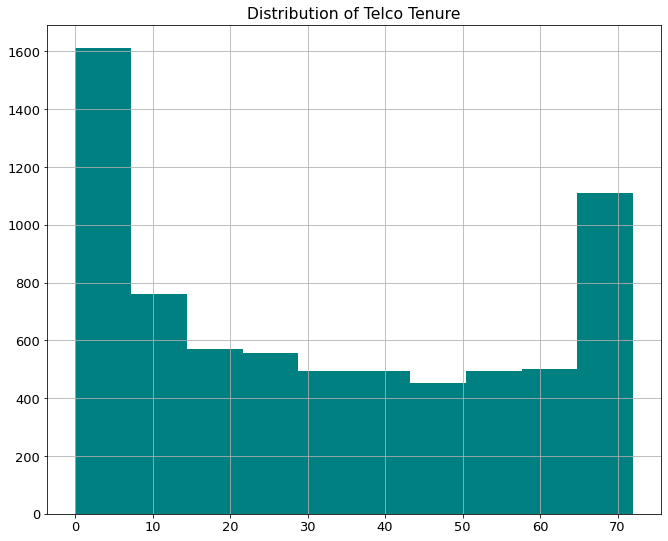

In [43]:
df['tenure'].hist(color='teal')

plt.title('Distribution of Telco Tenure')
plt.show()

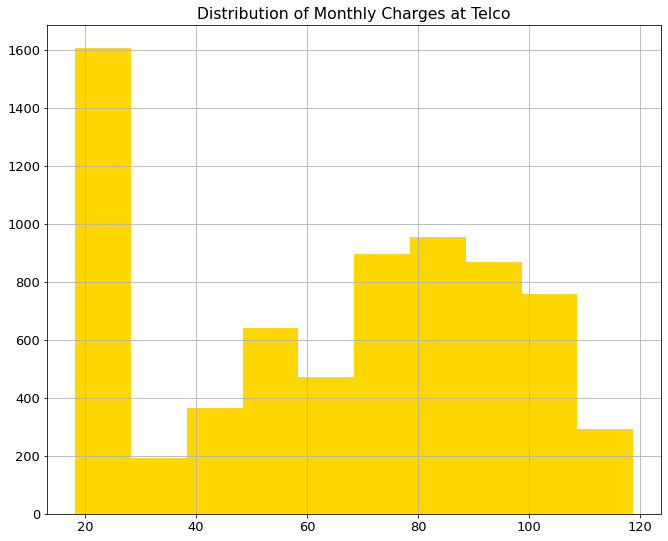

In [44]:
df['monthly_charges'].hist(color='gold')

plt.title('Distribution of Monthly Charges at Telco')
plt.show()

#### Findings
- Most columns that are strings/objects need to be converted to numerical variables for data exploration and modeling
- Streaming tv and streaming movies columns have "yes/no/no internet service" variables which can be reduced to only "yes/no"
- Tenure is showing it is the highest at the start of service within the first year.
- Many customers pay around $20-30 monthly

# Data Preparation

In [3]:
#look for:
    # duplicate cols
    # cols w/ too many nulls
    # unnecessary cols to remove
    # missing values needed to be filled in
    # variables needing encoding

In [4]:
#import clean data (clean_telco(df))

In [6]:
#split the data (split(df, stratify_by=None))

# Data Exploration

In [7]:
#explore the target (train data)/id features related to churn
# use exlore.py and explore-framework.ipynb for reference


In [8]:
#answer key questions (hypotheses) (figure out drivers of churn)

In [9]:
#run 2 statistical tests
    # null/alternative hypotheses
    # set alpha
    # document findings
#create visualizations

# Data Modeling and Evaluation

In [10]:
# get baseline accuracy

In [11]:
#train/compare baseline to 3 different models 
# select best 3 out of Decision Tree, Random Forest, KNN, Logistic Regression

In [12]:
#Steps:
    # split data
    # model on train (in-sample) dataset
    # set up X inputs and y target variables for each split
    # fit/transform/evaluate lots of models (using decision trees, random forests, knn, or logistic regression)
    # specify different feature selection/hyper-parameters
    # then get scores on validate to COMPARE to the best train models’ scores
    # use validate scores to tune features/parameters (if validate score goes lower, then it is not a good model to test. if validate scores is higher or roughly the same, then you can test it)
    # once one model is chosen (b/c it has a good score on train AND validate), then test it ONCE
    # summarize results (classification report) from test dataset
    # interpret and document the results y ya estas

In [13]:
#summarize results/performance from test dataset (classification report)

# Probability of churn and Predictions of churn

In [14]:
# generate the csv w/ cust id, pred prob for each customer id

In [ ]:
# make a hyperlink to go back to readme to show:
    # key findings
    # recommendations based on what was found